In [62]:
from sklearn.model_selection import train_test_split

import pandas as pd

dat = pd.read_csv('drive_used_labeled.csv')

train, test = train_test_split(dat, train_size=60, random_state=501)

In [63]:
len(train)

60

In [64]:
len(test)

175

In [65]:
X_train = train.iloc[:, 3:11]
y_train = train.iloc[:,0]
X_test = test.iloc[:, 3:11]
y_test = test.iloc[:,0]

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
  {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1], 'kernel': ['rbf']},
  {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1], 'kernel': ['sigmoid']},
 ]
svc = SVC()
search = GridSearchCV(svc, param_grid, cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
                          'kernel': ['sigmoid']}])

In [67]:
search.cv_results_

{'mean_fit_time': array([0.00120583, 0.00120153, 0.00100045, 0.0010006 , 0.00219746,
        0.00139971, 0.00180058, 0.00139894, 0.00159993, 0.00119987,
        0.00180044, 0.00180001, 0.00159988, 0.00119991, 0.00139937,
        0.0014008 , 0.00159931, 0.0015995 , 0.00160046, 0.0013998 ,
        0.00160084]),
 'std_fit_time': array([4.12513769e-04, 4.16127420e-04, 9.46494734e-07, 6.64157308e-07,
        9.80517541e-04, 4.90115685e-04, 3.99971520e-04, 4.89085799e-04,
        4.90388213e-04, 3.99994918e-04, 7.48621348e-04, 4.00043624e-04,
        4.90154704e-04, 4.00209583e-04, 4.89998954e-04, 4.90876621e-04,
        4.89006328e-04, 4.89940711e-04, 4.90037787e-04, 4.90232417e-04,
        4.90455068e-04]),
 'mean_score_time': array([0.00119424, 0.00100336, 0.00099945, 0.00120234, 0.00160084,
        0.00100002, 0.00099959, 0.00120115, 0.00099993, 0.00100017,
        0.00119987, 0.00139971, 0.00100007, 0.00119996, 0.00140114,
        0.00099964, 0.00100007, 0.00100012, 0.00099955, 0.001000

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = search.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[36,  0],
       [ 6, 18]], dtype=int64)

In [69]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        36
           1       1.00      0.75      0.86        24

    accuracy                           0.90        60
   macro avg       0.93      0.88      0.89        60
weighted avg       0.91      0.90      0.90        60



In [70]:
y_pred_test = search.predict(X_test)
test

,CHIA_IMPACT,base_price,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,brand,product,drive_type,drive_subtype,capacity
81,1,4659.548387,1.0,1.042590,1.067970,1.040194,1.061137,1.118034,0.761953,0.719411,1.005076,1.162871,SanDisk,ssd plus,ssd,sata,512gb
211,1,23052.419355,1.0,0.917308,0.996956,1.374836,1.626168,2.562697,2.081226,1.920136,1.428021,1.421863,Western Digital,wd red pro,hdd,35,14tb
150,0,14500.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.986138,0.969008,0.937862,0.969126,Seagate,firecuda,hdd,35,1tb
179,1,19790.000000,1.0,0.981008,0.878423,0.953714,1.364275,1.364275,1.416435,1.671243,1.987563,2.021172,Seagate,skyhawk ai,hdd,35,10tb
120,0,1996.838710,1.0,1.251478,1.134002,1.049158,1.049158,1.049158,1.000000,1.000000,1.000000,1.000000,Western Digital,wd green,ssd,sata,128gb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0,4749.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,ADATA,su650,ssd,m2,512gb
123,1,7136.064516,1.0,1.074722,1.099987,1.121622,1.179470,1.163452,1.113097,1.087312,1.106987,1.048558,Western Digital,wd green,ssd,sata,1tb
146,1,14014.967742,1.0,0.914216,0.871695,0.927675,1.009752,1.086298,0.962639,1.073138,1.044498,1.033395,Seagate,barracuda,hdd,35,8tb
94,0,19267.903226,1.0,0.982300,1.006729,0.978847,1.004728,1.000711,0.983839,0.954484,0.830914,0.851880,Seagate,barracuda 120,ssd,sata,2tb


<Figure size 576x432 with 0 Axes>

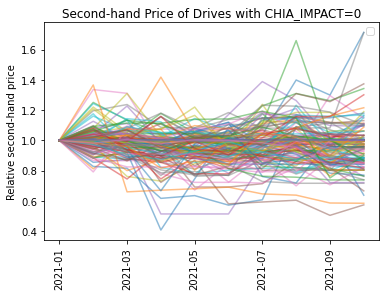

In [71]:
all_0 = test[y_pred_test == 0]
all_0 = all_0.iloc[:, 2:12]

all_0 = all_0.transpose()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
all_0.plot(alpha=0.5)
plt.legend("")
plt.xticks(rotation=90)
plt.ylabel("Relative second-hand price")
plt.title("Second-hand Price of Drives with CHIA_IMPACT=0")
plt.savefig('sc_chia0.png', dpi=300)
plt.show()

<Figure size 576x432 with 0 Axes>

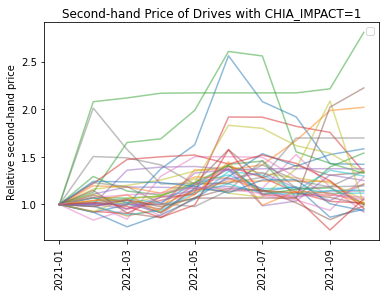

In [72]:
all_1 = test[y_pred_test == 1]
all_1 = all_1.iloc[:, 2:12]
all_1 = all_1.transpose()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
all_1.plot(alpha=0.5)
plt.legend("")
plt.xticks(rotation=90)
plt.ylabel("Relative second-hand price")
plt.title("Second-hand Price of Drives with CHIA_IMPACT=1")
plt.savefig('sc_chia1.png', dpi=300)
plt.show()